<h1>Flats prices analysis in St. Petersburg</h1>

<div style="background:#abd5f5; border:1px solid #b3deff; padding: 20px">
    <h2 style="color:#002b63">Table of content</h2>
<ul>
    <li>Indroduction</li>
    <li>Visualization</li>
    <li>Data Preprocessing</li>
    <li>Model building</li>
    <li>Results</li>
    <li>Conclusion</li>
</ul>
    </div>

<h2>Indroduction</h2>

This analysis focuses on flat prices in St. Petersburg. 
- First step is visualization. I am going to explore data with different plots
- Next, I prepare data for analysis. 
- At last, I want to build predictive models using different methods.

<h2>Visualization</h2>

I am going to use my own CSV file. I created it using data from https://spb.cian.ru/kupit-kvartiru/ This file contains a list of St. Petersburg flats for sale.

In [1]:
import pandas as pd
import numpy as np
import re #regexp
import sklearn
import matplotlib

In [2]:
flats=pd.read_csv('data/flats_all.csv',sep=';')
flats.head()

,link,price,total_area,living_area,kitchen_area,floor,type,height,bathrooms,balconies,...,renovation,view,rooms,city,area,neighborhood,street,metro_name,metro_km,number_of_floors
0,https://spb.cian.ru/sale/flat/234775065/,13143249.0,74.13,26.3,22.0,3,Новостройка,3.3,2.0,1.0,...,NaN,NaN,2,Санкт-Петербург,р-н Приморский,Юнтолово,"Планерная ул., 94",Комендантский проспект,1.98,12
1,https://spb.cian.ru/sale/flat/239273301/,12430600.0,47.81,NaN,NaN,2,Новостройка,NaN,0.0,0.0,...,NaN,NaN,1,Санкт-Петербург,р-н Петроградский,Посадский,"ул. Рентгена, 25",Петроградская,1.04,8
2,https://spb.cian.ru/sale/flat/250966190/,13800000.0,44.10,14.1,19.4,2,Новостройка,NaN,0.0,0.0,...,NaN,NaN,1,Санкт-Петербург,р-н Курортный,мкр. Сестрорецк,"ул. Максима Горького, 2Ас2",Беговая,9.57,5
3,https://spb.cian.ru/sale/flat/249950664/,8730851.0,56.29,29.3,10.9,5,Новостройка,NaN,2.0,2.0,...,NaN,NaN,2,Санкт-Петербург,р-н Приморский,Юнтолово,Нью Тайм жилой комплекс,Комендантский проспект,1.98,13
4,https://spb.cian.ru/sale/flat/250766812/,13650000.0,70.80,NaN,10.0,13,Вторичка,2.8,1.0,1.0,...,Евроремонт,На улицу и двор,2,Санкт-Петербург,р-н Приморский,Комендантский аэродром,"аллея Поликарпова, 6к1",Пионерская,1.04,19


Features description.

<table>
    <tr>
        <th>N</th>
        <th>Name</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>1</td>
        <td>link</td>
        <td>Link to the page with the flat on cian.ru</td>
    </tr>
    <tr>
        <td>2</td>       
        <td>price</td>
        <td>Flat price</td>
    </tr>
    <tr>
        <td>3</td>
        <td>total_area</td>
        <td>The total area of the flat in square meters</td>
    </tr>
    <tr>
        <td>4</td>        
        <td>living_area</td>
        <td>All bedrooms area plus living room in square meters</td>
    </tr>
    <tr>
        <td>5</td>
        <td>kitchen_area</td>
        <td>Kitchen area in square meters</td>
    </tr>
    <tr>
        <td>6</td>
        <td>floor</td>
        <td>Floor number where the flat is located</td>
    </tr>
    <tr>
        <td>7</td>
        <td>type</td>
        <td>Building type: new (still under construction) or old</td>
    </tr>
    <tr>
        <td>8</td>
        <td>height</td>
        <td>Ceiling height</td>
    </tr>    
    <tr>
        <td>9</td>
        <td>bathrooms</td>
        <td>Number of bathrooms</td>
    </tr>
    <tr>
        <td>10</td>
        <td>balconies</td>
        <td>Number of balconies</td>
    </tr>
    <tr>
        <td>11</td>
        <td>finishing</td>
        <td>Finishing type of new flats: renovated and without</td>
    </tr>    
    <tr>
        <td>12</td>
        <td>year_of_construction</td>
        <td>Year when the building was or will be built</td>
    </tr>    
    <tr>
        <td>13</td>
        <td>layout</td>
        <td>The layout determines how the entrance to the rooms is located: through another room or through a corridor</td>
    </tr>    
    <tr>
        <td>14</td>
        <td>renovation</td>
        <td>Type of renovation</td>
    </tr>    
    <tr>
        <td>15</td>
        <td>view</td>
        <td>View from windows</td>
    </tr> 
    <tr>
        <td>16</td>
        <td>rooms</td>
        <td>Number of rooms</td>
    </tr>     
    <tr>
        <td>17</td>
        <td>city</td>
        <td>City name</td>
    </tr>     
    <tr>
        <td>18</td>
        <td>area</td>
        <td>Area name</td>
    </tr>     
    <tr>
        <td>19</td>
        <td>neighborhood</td>
        <td>Neighborhood name</td>
    </tr> 
    <tr>
        <td>20</td>
        <td>street</td>
        <td>Street name</td>
    </tr>     
    <tr>
        <td>21</td>
        <td>metro_name</td>
        <td>The closest metro station</td>
    </tr>     
    <tr>
        <td>22</td>
        <td>metro_km</td>
        <td>Distance to the closest metro station in km</td>
    </tr>     
    <tr>
        <td>23</td>
        <td>number_of_floors</td>
        <td>Number of floors in the buildings</td>
    </tr>
</table>

I calcuclate the price for a square meter.

In [3]:
flats.insert(0,'price_meter',0.0)
flats['price_meter']=flats['price']/flats['total_area']

Let's check the dependence between price per meter and most perspective variables.

<AxesSubplot:title={'center':'Dependence between price_meter and living_area'}, xlabel='living_area', ylabel='price_meter'>

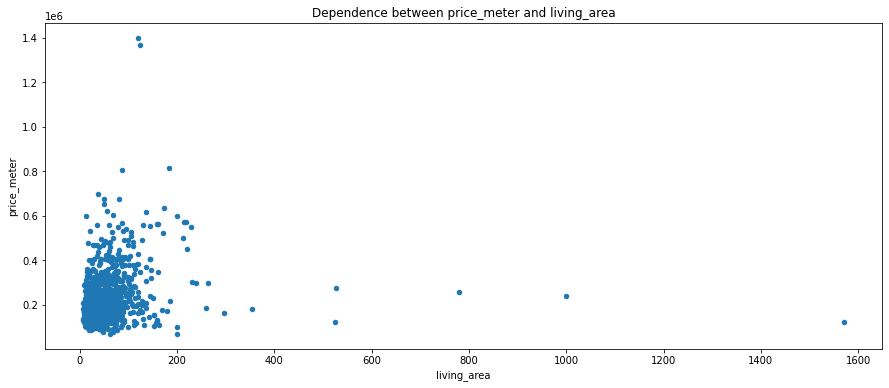

In [4]:
flats.plot(kind='scatter',x='living_area',y='price_meter',figsize=(15,6),
           title='Dependence between price_meter and living_area')

<AxesSubplot:title={'center':'Dependence between floor and living_area'}, xlabel='floor', ylabel='price_meter'>

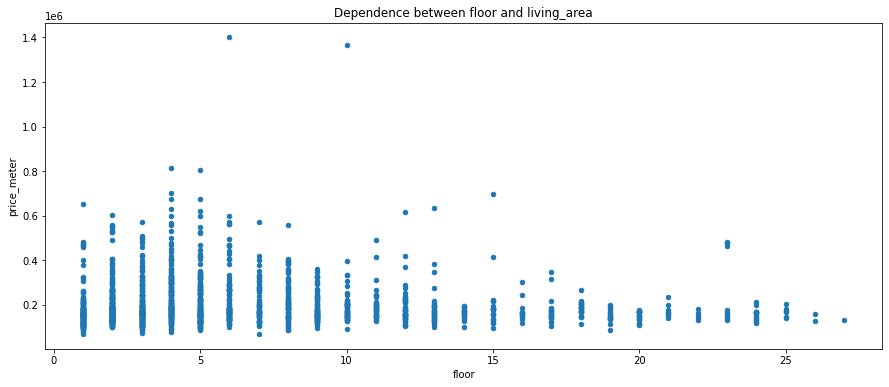

In [5]:
flats.plot(kind='scatter',x='floor',y='price_meter',figsize=(15,6),
           title='Dependence between floor and living_area')

<AxesSubplot:title={'center':'Dependence between price_meter and height'}, xlabel='height', ylabel='price_meter'>

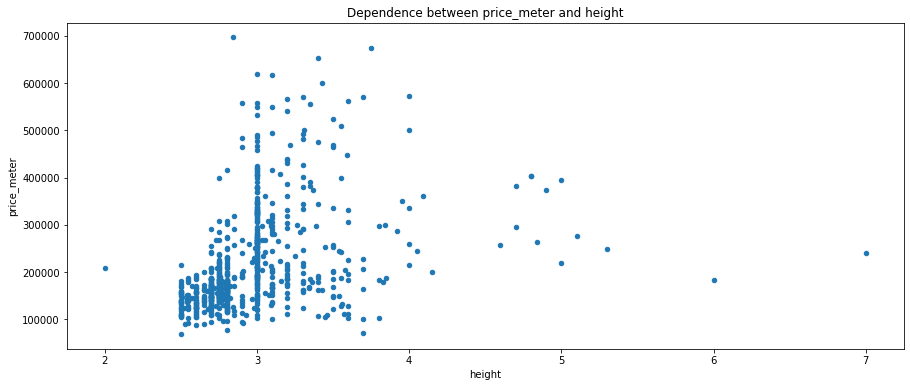

In [6]:
flats.plot(kind='scatter',x='height',y='price_meter',figsize=(15,6),
           title='Dependence between price_meter and height')

<AxesSubplot:title={'center':'Dependence between price_meter and year_of_construction'}, xlabel='year_of_construction', ylabel='price_meter'>

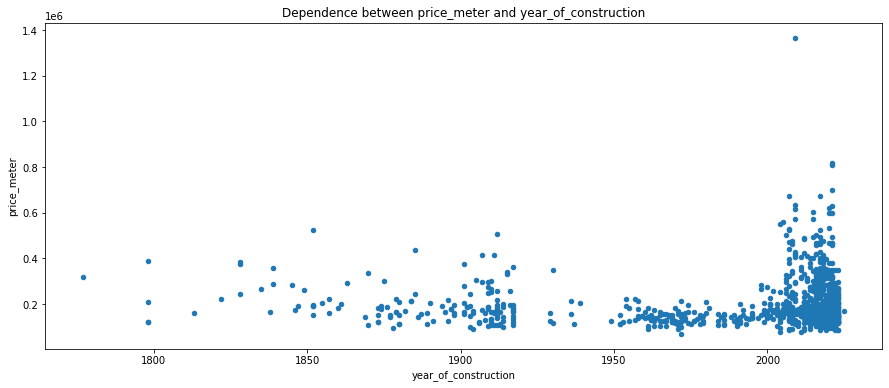

In [7]:
flats.plot(kind='scatter',x='year_of_construction',y='price_meter',figsize=(15,6),
           title='Dependence between price_meter and year_of_construction')

<AxesSubplot:title={'center':'Dependence between price_meter and metro_km'}, xlabel='metro_km', ylabel='price_meter'>

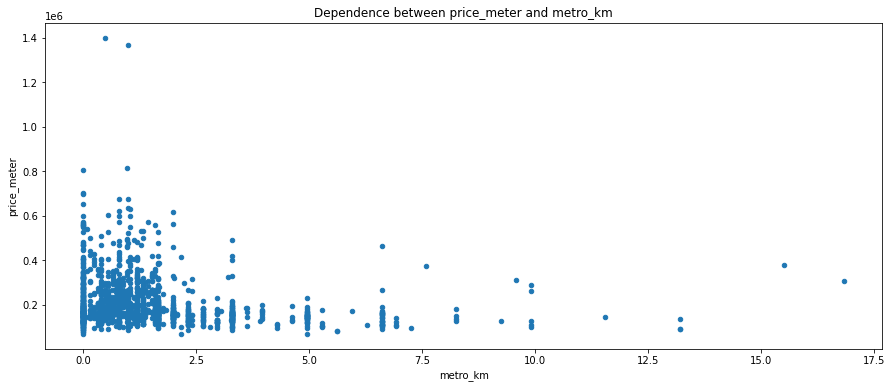

In [8]:
flats.plot(kind='scatter',x='metro_km',y='price_meter',figsize=(15,6),
           title='Dependence between price_meter and metro_km')

As we see, the price mostly has a big scatter. There are not the visible and clear dependence. Nevertheless, I will try to build a predictive model.

<h2>Data Preprocessing</h2>

Let's check values in the column 'rooms'.

In [9]:
flats['rooms'].value_counts()

2                 353
3                 333
1                 309
Студия            169
4                 122
5                  52
Многокомнатная     39
Апартаменты        31
Квартира            6
Name: rooms, dtype: int64

Next, I replace 'Студия' with 0.5 and 'Многокомнатная' with 6. Values 'Апартаменты', 'Квартира' don't contain information about the number of rooms so I replace them with the most frequent value. Also, I convert the column into the float format.

In [10]:
flats['rooms']=flats['rooms'].replace(['Студия','Многокомнатная','Многокомнатные'],['0.5',6,6])
flats['rooms']=flats['rooms'].replace(['Апартаменты','Квартира'],flats['rooms'].value_counts().idxmax())
flats['rooms']=flats['rooms'].astype(float)
flats[['rooms']].head()

,rooms
0,2.0
1,1.0
2,1.0
3,2.0
4,2.0


Next, I will translate all categorical values into English.

In [11]:
flats['type']=flats['type'].replace(['Вторичка','Новостройка'],['secondary','new'])
flats['view']=flats['view'].replace(['На улицу и двор','Во двор','На улицу'],['both','view_courtyard','view_street'])
flats['finishing']=flats['finishing'].replace(['Чистовая','Нет','Черновая'],['fine','none','rough'])
flats['layout']=flats['layout'].replace(['Изолированная','Смежно-изолированная','Смежная'],['isolated','mixed','adjoining'])
flats['renovation']=flats['renovation'].replace(['Евроремонт','Без ремонта','Косметический','Дизайнерский'],
                                                ['euro','none','redecorating','designer'])

The next step is finding and removing missing data. Firstly, let's identify NaNs and zeros.

In [12]:
pd.isna(flats).sum()

price_meter                0
link                       0
price                      0
total_area                 0
living_area              159
kitchen_area             261
floor                      0
type                       0
height                   685
bathrooms                  0
balconies                  0
finishing               1187
year_of_construction     203
layout                   898
renovation               462
view                     560
rooms                      0
city                       0
area                       0
neighborhood              13
street                    13
metro_name               135
metro_km                   0
number_of_floors           0
dtype: int64

Now I will find out the proportion between living_area, kitchen_area, total_area and replace missing data with the most common proportion.

In [13]:
flats['living_part']=flats['living_area']/flats['total_area']
flats['kitchen_part']=flats['kitchen_area']/flats['total_area']
flats['living_area']=flats['living_area'].combine_first(flats['total_area']*flats['living_part'].mean())
flats['kitchen_area']=flats['kitchen_area'].combine_first(flats['total_area']*flats['kitchen_part'].mean())
flats.drop(['living_part','kitchen_part'],axis='columns',inplace=True)

I replace missing data in columns 'view', 'finishing', 'layout', 'renovation','year_of_construction' with the most popular value.

In [14]:
flats['view']=flats['view'].replace(np.nan,flats['view'].value_counts().idxmax())
flats['finishing']=flats['finishing'].replace(np.nan,flats['finishing'].value_counts().idxmax())
flats['layout']=flats['layout'].replace(np.nan,flats['layout'].value_counts().idxmax())
flats['renovation']=flats['renovation'].replace(np.nan,flats['renovation'].value_counts().idxmax())
flats['year_of_construction']=flats['year_of_construction'].replace(np.nan,flats['year_of_construction'].value_counts().idxmax())

I replace the height with the mean value. 

In [15]:
flats['height']=flats['height'].replace(np.nan,flats['height'].mean())

Finally, I drop lines with missing values in 'street'

In [16]:
flats.drop(flats[flats['street'].isna()].index,axis='rows',inplace=True)

<h2>Model building</h2>

Here I am going to build a predictive model. Price per meter is a dependent value. The rest of the characteristics are independent values. First, I need to prepare a dataframe. I create a copy of the "flats". I decided not to use geolocation data. Otherwise, there will be too many categorical variables that probably won't improve my model. Geodata requires one more analysis.

In [17]:
flats_model=flats.copy()
flats_model.drop(['link','price','city','street','neighborhood','metro_name','area'],axis='columns',inplace=True)

In [18]:
flats_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1413
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price_meter           1401 non-null   float64
 1   total_area            1401 non-null   float64
 2   living_area           1401 non-null   float64
 3   kitchen_area          1401 non-null   float64
 4   floor                 1401 non-null   int64  
 5   type                  1401 non-null   object 
 6   height                1401 non-null   float64
 7   bathrooms             1401 non-null   float64
 8   balconies             1401 non-null   float64
 9   finishing             1401 non-null   object 
 10  year_of_construction  1401 non-null   float64
 11  layout                1401 non-null   object 
 12  renovation            1401 non-null   object 
 13  view                  1401 non-null   object 
 14  rooms                 1401 non-null   float64
 15  metro_km             

Next, I need to turn all categorical values into numerical. I use 'get_dummies' function from pandas.

In [20]:
cat_df=flats_model[['type','view','finishing','layout','renovation']]
cat_df=pd.get_dummies(data=cat_df,drop_first=True)

#Join all the dataframes in one
flats_model=pd.concat([flats_model,cat_df],axis=1)
flats_model.drop(['type','view','finishing','layout','renovation'],axis='columns',inplace=True)

# Check the result
flats_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 0 to 1413
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_meter              1401 non-null   float64
 1   total_area               1401 non-null   float64
 2   living_area              1401 non-null   float64
 3   kitchen_area             1401 non-null   float64
 4   floor                    1401 non-null   int64  
 5   height                   1401 non-null   float64
 6   bathrooms                1401 non-null   float64
 7   balconies                1401 non-null   float64
 8   year_of_construction     1401 non-null   float64
 9   rooms                    1401 non-null   float64
 10  metro_km                 1401 non-null   float64
 11  number_of_floors         1401 non-null   int64  
 12  type_secondary           1401 non-null   uint8  
 13  view_view_courtyard      1401 non-null   uint8  
 14  view_view_street        

Let's check correlation among features. We need to remove features with strong correlation (>0.9). Otherwise they can spoil the model

In [21]:
corr=flats_model.iloc[:,1:].corr()
corr[corr.loc[:]>0.9]

,total_area,living_area,kitchen_area,floor,height,bathrooms,balconies,year_of_construction,rooms,metro_km,...,type_secondary,view_view_courtyard,view_view_street,finishing_none,finishing_rough,layout_isolated,layout_mixed,renovation_euro,renovation_none,renovation_redecorating
total_area,1.000000,0.977648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
living_area,0.977648,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kitchen_area,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balconies,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
metro_km,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


"total_area" and "living_area" have strong correlation. I think it is better to remove "total_area" because this feature has already been taken into account when I calculated "price_meter".

In [22]:
flats_model.drop(['total_area'],axis='columns',inplace=True)

Let's separate dependent and independent values. After that, I divided them into training and test sets. 

In [31]:
#separation flats_model on X (independent variables) and Y (dependent)
Y=flats_model['price_meter']
X=flats_model.drop(['price_meter'],axis=1)

#split on test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

I will build models using different kinds of regression Also, we should scaling data because of the big difference among features. I will use r2 in order to assess my models. 

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

#scaling
scale=StandardScaler().fit(X_train)
X_train_sc=scale.transform(X_train)
X_test_sc=scale.transform(X_test)

#array of methods
models=[LinearRegression(),RandomForestRegressor(),RidgeCV(),Lasso()]
for model in models:
    #fir the model
    model.fit(X_train_sc,Y_train)
    #calculate R squarred
    r2=model.score(X_test_sc,Y_test)
    #print the result
    m=str(model)
    print('r2 for',m[:m.index('(')],'=',r2)

r2 for LinearRegression = 0.3326599274228468
r2 for RandomForestRegressor = 0.4105536015096334
r2 for RidgeCV = 0.33074580182994684
r2 for Lasso = 0.33265217838473937


As we see r2 is little. The best value is r2 for RandomForestRegressor. Let's try to improve the accuracy of models. The next step is changing the set of dependent variables. 

In [33]:
from sklearn.feature_selection import RFE

#create dataframe for R squarred from different models 
r2=pd.DataFrame()
j=-1
#loop in the models
for model in models:
    j+=1
    #write the name of model into r2 dataframe
    m=str(model)
    r2.loc[0,j]=m[:m.index('(')]
    #loop from 20 (number of params) down to 1
    for i in range(X_train.shape[1],0,-1):
        #rank features
        selector=RFE(model,n_features_to_select=i)
        selector.fit(X_train_sc,Y_train)
        #calculate and write R squarred
        r2.loc[i,j]=selector.score(X_test_sc,Y_test)

#rename the head of dataframe
r2.rename(columns=r2.loc[0],inplace=True)
r2=r2.drop(0,axis=0)
#convert the dataframe into float
r2=r2.astype(float)

<h2>Results</h1>

Let's check the results

In [34]:
r2_max=r2.max().max()
print('The max R2 =',r2_max)
best_method=r2.max().idxmax()
print('The best methods is',best_method)
number_of_params=r2.idxmax()[best_method]
print('The number of params for the max R2 =',number_of_params)

The max R2 = 0.44598709842492235
The best methods is RandomForestRegressor
The number of params for the max R2 = 15


Above we see the best R2 for the best method - Random Forest Regression. Below I check the parameters for the model.

In [35]:
selector=RFE(RandomForestRegressor(),n_features_to_select=number_of_params)
selector.fit(X_train_sc,Y_train)
best_params=selector.support_
new_X=[]
print('Selected params:')
for param,x in zip(best_params,X):
    if param:
        new_X.append(x)
        print(x)

Selected params:
living_area
kitchen_area
floor
height
bathrooms
balconies
year_of_construction
rooms
metro_km
number_of_floors
type_secondary
view_view_courtyard
renovation_euro
renovation_none
renovation_redecorating


<h2>Conclusion</h2>

Summarising all above
- I cleaned and preprocessed the data. I replace missing data with the most frequent value. Also, I turned categorical variables into numerical using get_dummies.
- I removed the variable "Total_area" because of the strong correlation (>0.9) with living_area. 
- I created regression models for predicting a price per meter for flats in Saint Petersburg using methods: Linear Regression, Random Forest Regression, RidgeCV, Lasso
- The best method is Random Forest Regression. R2 for this is bigger than R2 for other methods
- I tried to improve the models using RFE - recursive function for selection dependent variables. The best method is Random Forest Regression again. The accuracy (R2) of the model rose a little. Variables that impact the most are listed above.

Thus, I could create a model which explains almost half of the dispersion of the price per meter of flats on St. Petersburg. 